# Factorization Machines

In [27]:
import pandas as pd

In [41]:
clicks = pd.read_csv('../data/clicks_train.csv')
page_views = pd.read_csv('../data/page_views_sample.csv')
events = pd.read_csv('../data/events.csv')

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_19007/4035773068.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('../data/events.csv')


In [42]:
print(len(clicks))
print(len(page_views))
print(len(events))

87141731
9999999
23120126


In [43]:
clicks.head()

display_id   ad_id  clicked
0           1   42337        0
1           1  139684        0
2           1  144739        1
3           1  156824        0
4           1  279295        0

In [44]:
page_views.head()

uuid  document_id  timestamp  platform geo_location  \
0  1fd5f051fba643          120   31905835         1           RS   
1  8557aa9004be3b          120   32053104         1        VN>44   
2  c351b277a358f0          120   54013023         1        KR>12   
3  8205775c5387f9          120   44196592         1        IN>16   
4  9cb0ccd8458371          120   65817371         1    US>CA>807   

   traffic_source  
0               2  
1               2  
2               1  
3               2  
4               2

In [45]:
events.head()

display_id            uuid  document_id  timestamp platform geo_location
0           1  cb8c55702adb93       379743         61        3    US>SC>519
1           2  79a85fa78311b9      1794259         81        2    US>CA>807
2           3  822932ce3d8757      1179111        182        2    US>MI>505
3           4  85281d0a49f7ac      1777797        234        2    US>WV>564
4           5  8d0daef4bf5b56       252458        338        2        SG>00

In [46]:
tmp = pd.merge(events, page_views, on = ['uuid', 'document_id', 'timestamp', 'platform', 'geo_location'], how = 'inner')
print(len(tmp))

70665


In [47]:
tmp

display_id            uuid  document_id  timestamp platform  \
0              37  d4f62cdcb39ad8      1779285       2687        2   
1              56  7f9b8ead7a7162      1108855       3925        2   
2              62  65861840b3ab9f      1781623       4651        2   
3              76  23c6c76aeab262      1727629       5723        3   
4              79  9d376148017289      1672143       5793        1   
...           ...             ...          ...        ...      ...   
70660    17130085  2b311091de12b4      1703872   86326140        3   
70661    17130088  d94cc003c9ed04      1893428   86327398        2   
70662    17130120  2b01955160eba9      1068289   86342251        2   
70663    17130201  479483bcff421f      1858440   86373921        3   
70664    17130242  c12e88615ea39f      1859200   86389153        2   

      geo_location  traffic_source  
0        US>WA>819               1  
1            CA>ON               1  
2        US>AZ>789               3  
3        US>IL>609               1  
4        US>NM>790               1  
...            ...             ...  
70660    US>LA>716               1  
70661    US>TX>618               1  
70662    US>NC>560               1  
70663    US>CO>752               1  
70664    US>TX>623               1  

[70665 rows x 7 columns]

In [48]:
tmp = pd.merge(tmp, clicks, on = 'display_id', how = 'inner')
print(len(tmp))

303277


In [49]:
tmp

display_id            uuid  document_id  timestamp platform  \
0               37  d4f62cdcb39ad8      1779285       2687        2   
1               37  d4f62cdcb39ad8      1779285       2687        2   
2               37  d4f62cdcb39ad8      1779285       2687        2   
3               37  d4f62cdcb39ad8      1779285       2687        2   
4               37  d4f62cdcb39ad8      1779285       2687        2   
...            ...             ...          ...        ...      ...   
303272     1445170  6da618e756bbb7      1838500   86397584        2   
303273     1445179  bec600a49a77c9      1890141   86398635        2   
303274     1445179  bec600a49a77c9      1890141   86398635        2   
303275     1445179  bec600a49a77c9      1890141   86398635        2   
303276     1445179  bec600a49a77c9      1890141   86398635        2   

       geo_location  traffic_source   ad_id  clicked  
0         US>WA>819               1   70153        0  
1         US>WA>819               1  149047        0  
2         US>WA>819               1  169564        0  
3         US>WA>819               1  234713        1  
4         US>WA>819               1  235443        0  
...             ...             ...     ...      ...  
303272    US>CA>803               1  281595        0  
303273    US>TX>635               1   11820        0  
303274    US>TX>635               1   39776        0  
303275    US>TX>635               1   76778        0  
303276    US>TX>635               1  186977        1  

[303277 rows x 9 columns]

In [51]:
tmp.head()

display_id            uuid  document_id  timestamp platform geo_location  \
0          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
1          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
2          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
3          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
4          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   

   traffic_source   ad_id  clicked  
0               1   70153        0  
1               1  149047        0  
2               1  169564        0  
3               1  234713        1  
4               1  235443        0

In [141]:
class Config:
    category_col = ['display_id', 'uuid', 'document_id', 'timestamp', 'platform', "geo_location", 'traffic_source', 'ad_id']
    num_col = []
    target_col = ['clicked']
    
    # seed=2021
    epochs=5
    batch_size=128
    seed=17
    embedding_dim=8
    lr=1e-4
    
config=Config()

In [167]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


def build_preprocessor(config): 
    category_col = config.category_col
    num_col = config.num_col
    
    num_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ('std', (StandardScaler())),])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value='NAN')),
        ('oe', (OrdinalEncoder())),
        ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_col),
            ('cat', categorical_transformer, category_col),
        ],
        remainder="drop")
    return preprocessor
    
def preprocess(df, config):
    
    category_col = config.category_col
    num_col = config.num_col
    target_col = config.target_col
    
    # Only use movies with more than 10 views
    print(df.shape)
    movie_cnt = df.groupby('ad_id').size()
    use_movies = list(movie_cnt[movie_cnt > 10].index)
    df = df[df['ad_id'].isin(use_movies)]
    print(df.shape)

    # Create a label column for binary classification.
    # df.insert(df.shape[1],target_col,df['clicked']>0,True)
    #df[target_col] = df['rating'] >= 4.0
    df[target_col] = df[target_col].astype(int)

    # Build pipeline
    pp = build_preprocessor(config)
    pp.fit(df)
    return df, pp



In [168]:
df, pp = preprocess(tmp, config)

(303277, 9)
(242895, 9)


/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_19007/1902540191.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_col] = df[target_col].astype(int)


In [169]:
df.head()

display_id            uuid  document_id  timestamp platform geo_location  \
1          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
2          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
3          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
4          37  d4f62cdcb39ad8      1779285       2687        2    US>WA>819   
5          56  7f9b8ead7a7162      1108855       3925        2        CA>ON   

   traffic_source   ad_id  clicked  
1               1  149047        0  
2               1  169564        0  
3               1  234713        1  
4               1  235443        0  
5               1   51445        0

In [170]:
pp.transform(df).shape

(242895, 8)

In [171]:
# split data
tra_df, val_df = train_test_split(df, test_size=0.2, stratify=df['ad_id'], random_state=config.seed)
print(tra_df.shape)
print(val_df.shape)

(194316, 9)
(48579, 9)


In [69]:
assert tra_df.ad_id.nunique() == val_df.ad_id.nunique()
assert len(set(val_df.uuid) - set(tra_df.uuid)) == 0

AssertionError: 

In [172]:
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, add, Activation, dot
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2 as l2_reg
import itertools
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

def build_model(category_num, category_cols, num_cols, K=8, solver='adam', l2=0.0, l2_fm=0.0):

    # Numerical features
    num_inputs = [Input(shape=(1,), name=col,) for col in num_cols]
    # Categorical features
    cat_inputs = [Input(shape=(1,), name=col,) for col in category_cols]

    inputs = num_inputs + cat_inputs

    flatten_layers=[]
    # Numerical featrue embedding
    for enc_inp, col in zip(num_inputs, num_cols):
        # num featrue dence
        x = Dense(K, name = f'embed_{col}',kernel_regularizer=l2_reg(l2_fm))(enc_inp)
        flatten_layers.append(x)

    # Category feature embedding
    for enc_inp, col in zip(cat_inputs, category_cols):
        num_c = category_num[col]
        embed_c = Embedding(input_dim=num_c,
                            output_dim=K,
                            input_length=1,
                            name=f'embed_{col}',
                            embeddings_regularizer=l2_reg(l2_fm))(enc_inp)
        flatten_c = Flatten()(embed_c)
        flatten_layers.append(flatten_c)
                
    # Feature interaction term
    fm_layers = []
    for emb1,emb2 in itertools.combinations(flatten_layers, 2):
        dot_layer = dot([emb1,emb2], axes=1)
        fm_layers.append(dot_layer)
        

    # Linear term
    for enc_inp,col in zip(cat_inputs, category_cols):
        # embedding
        num_c = category_num[col]
        embed_c = Embedding(input_dim=num_c,
                            output_dim=1,
                            input_length=1,
                            name=f'linear_{col}',
                            embeddings_regularizer=l2_reg(l2_fm))(enc_inp)
        flatten_c = Flatten()(embed_c)
        fm_layers.append(flatten_c)
                
    for enc_inp, col in zip(num_inputs, num_cols):
        x = Dense(1, name = f'linear_{col}',kernel_regularizer=l2_reg(l2_fm))(enc_inp)
        fm_layers.append(x)

    # Add all terms
    flatten = add(fm_layers)
    outputs = Activation('sigmoid',name='outputs')(flatten)
    
    model = Model(inputs=inputs, outputs=outputs)

    model.compile(
                optimizer=solver,
                loss='binary_crossentropy',
                metrics='accuracy'
              )

    return model 

In [173]:
category_num = {col: df[col].nunique() for col in config.category_col}
model = build_model(category_num, config.category_col, config.num_col)

In [174]:
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 display_id (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 uuid (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 document_id (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 timestamp (InputLayer)         [(None, 1)]          0           []                               
                                                                                           

In [175]:
# cb = [EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=2, verbose=0,)]
feature_num = len(config.category_col + config.num_col)
tra_inputs = [pp.transform(tra_df)[:, i] for i in range(feature_num)]
val_inputs = [pp.transform(val_df)[:, i] for i in range(feature_num)]

In [176]:
tra_df

display_id            uuid  document_id  timestamp platform  \
259960     1239815  ef9fe60b01037f       732651   74479961        2   
243148     1159578  78706f65850ad3      1867060   69782868        2   
248833     1186906  b7cbea64bed38d      1780813   71363261        1   
101151      553637  6de92966fac137       429475   41290172        1   
45360       194223  ddd52952195ce8      1802416   20766894        1   
...            ...             ...          ...        ...      ...   
204928      995063  7a338eceed4ec4       697594   61208362        2   
268643     1280235  6b22345aa91167      1456851   76826878        2   
69165       430284  1e8c38537e03d6      1789278   35288880        2   
264639     1260776  1fe6a3e7b7dfca        60164   75701751        1   
36254       154292  61bc1c91ab2efc      1356546   15748825        2   

       geo_location  traffic_source   ad_id  clicked  
259960    US>NY>526               3  116148        1  
243148    US>NY>501               1  140497        1  
248833    US>AR>670               1  183675        0  
101151        US>WI               1  292487        0  
45360     US>FL>539               1  224172        0  
...             ...             ...     ...      ...  
204928    US>MI>563               1  100945        0  
268643    US>FL>686               1   66484        1  
69165         CA>AB               2  204869        0  
264639    US>OH>510               1   61170        0  
36254         AU>04               3  183248        0  

[194316 rows x 9 columns]

In [177]:
history = model.fit(
          #x=pp.transform(tra_df).reshape(len(tra_df), feature_num, 1),
          x=tra_inputs,
          y=tra_df[config.target_col],
          epochs=config.epochs,
          batch_size=config.batch_size,
          validation_data=(val_inputs,
                           val_df[config.target_col]),
        #   callbacks=cb
         )

Epoch 1/5
1519/1519 [==============================] - 16s 8ms/step - loss: 0.5086 - accuracy: 0.7975 - val_loss: 0.4944 - val_accuracy: 0.7992
Epoch 2/5
1519/1519 [==============================] - 10s 6ms/step - loss: 0.4507 - accuracy: 0.8053 - val_loss: 0.5245 - val_accuracy: 0.7890
Epoch 3/5
1519/1519 [==============================] - 10s 6ms/step - loss: 0.4006 - accuracy: 0.8236 - val_loss: 0.5945 - val_accuracy: 0.7542
Epoch 4/5
1519/1519 [==============================] - 10s 6ms/step - loss: 0.3578 - accuracy: 0.8436 - val_loss: 0.6701 - val_accuracy: 0.7281
Epoch 5/5
1519/1519 [==============================] - 10s 6ms/step - loss: 0.3158 - accuracy: 0.8639 - val_loss: 0.7482 - val_accuracy: 0.7103


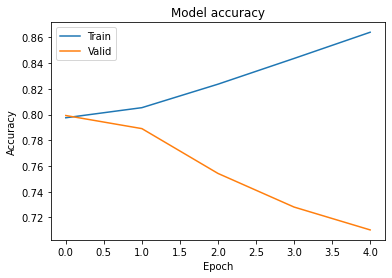

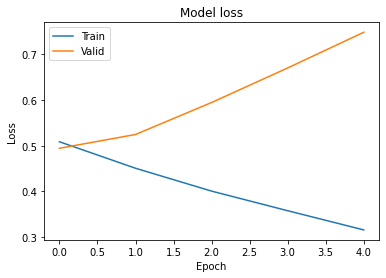

In [178]:
import matplotlib.pyplot as plt
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.show()    
plot_history(history)

In [180]:
val_df.head()

display_id            uuid  document_id  timestamp platform  \
221586     1068615  83491434afbdfa      1586626   64769437        1   
56422       244058  7c2393c4d71162       991577   25126070        1   
196506      955934  632ae227833dbb      1821895   59442102        1   
106565      575815  4d455287863f22      1801452   42359985        1   
17468        74610  aa6edaad6f244a      1782783    6239339        2   

       geo_location  traffic_source   ad_id  clicked  
221586    US>NC>517               1  227367        0  
56422     US>TN>659               1  234723        0  
196506    US>OK>671               2   50405        0  
106565           US               1  123945        0  
17468     US>UT>770               3  139936        1

In [181]:
user = '4d455287863f22' #user_id
user_df = val_df.reset_index(drop = True).query('uuid==@user')
user_df.head()

display_id            uuid  document_id  timestamp platform  \
3          575815  4d455287863f22      1801452   42359985        1   
3663       575815  4d455287863f22      1801452   42359985        1   
9483       575815  4d455287863f22      1801452   42359985        1   
44422      575815  4d455287863f22      1801452   42359985        1   

      geo_location  traffic_source   ad_id  clicked  
3               US               1  123945        0  
3663            US               1   15861        0  
9483            US               1  150057        0  
44422           US               1   69823        0

In [182]:
user_df.index

Int64Index([3, 3663, 9483, 44422], dtype='int64')

In [183]:
user_inputs = [pp.transform(val_df)[user_df.index, i] for i in range(feature_num)]
user_df['pred'] = model.predict(user_inputs)
user_df = user_df.sort_values('pred', ascending=False)

1/1 [==============================] - 1s 596ms/step


In [188]:
user_df[['display_id', 'ad_id', 'pred']].head(50)

display_id   ad_id      pred
3663       575815   15861  0.321340
44422      575815   69823  0.142869
3          575815  123945  0.035878
9483       575815  150057  0.020101